2-element Vector{Real}:
 1.0831552688123494
 0.9748287670067188

0.007548389701656129


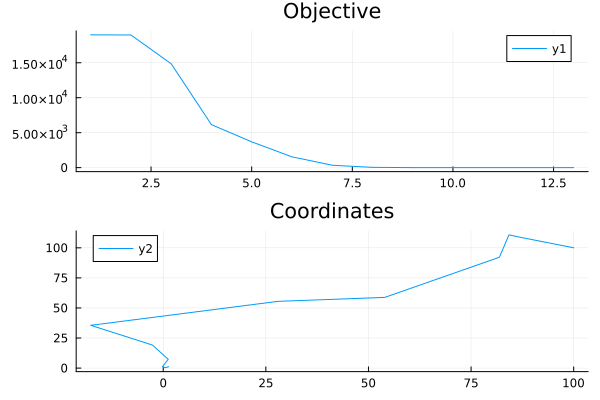

In [1]:
using EO

x_0 = [100, 100]
x_0 = get_real_chromosome(x_0)

objective     = enclose_arguments(f_sphere, ones(2))
preturbation! = enclose_arguments(gaussian_preturbation!, 10.)
termination   = enclose_argument(iteration_termination, 100)

res = first_improving_local_search(objective, preturbation!, termination, x_0);
println(res.top_value)
display(res.top_coords)

EO.plot_results(res)

### Local search using the general framework

generation: 0.0; fitness: 19755.353750568524; diversity: NaN
generation: 1.0; fitness: 15079.795725491398; diversity: NaN
generation: 2.0; fitness: 15079.795725491398; diversity: NaN
generation: 3.0; fitness: 14796.832745519343; diversity: NaN
generation: 4.0; fitness: 11617.93254513382; diversity: NaN
generation: 5.0; fitness: 11617.93254513382; diversity: NaN
generation: 6.0; fitness: 11617.93254513382; diversity: NaN
generation: 7.0; fitness: 11617.93254513382; diversity: NaN
generation: 8.0; fitness: 11617.93254513382; diversity: NaN
generation: 9.0; fitness: 11617.93254513382; diversity: NaN
generation: 10.0; fitness: 6769.085263070365; diversity: NaN
generation: 11.0; fitness: 6769.085263070365; diversity: NaN
generation: 12.0; fitness: 4909.780262035443; diversity: NaN
generation: 13.0; fitness: 4909.780262035443; diversity: NaN
generation: 14.0; fitness: 4909.780262035443; diversity: NaN
generation: 15.0; fitness: 4909.780262035443; diversity: NaN
generation: 16.0; fitness: 347

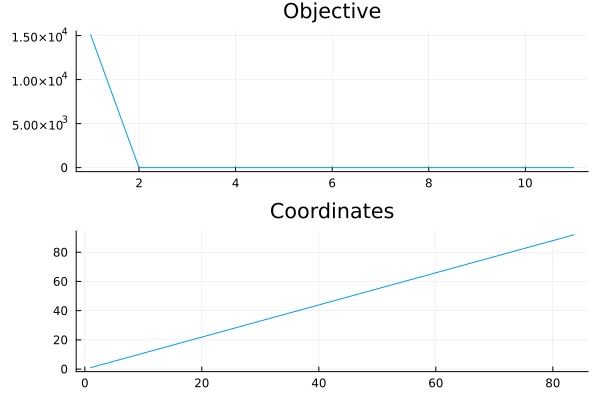

In [3]:
using EO

pop_size = 1
dimension = 2

objective_function  = enclose_arguments(f_sphere, ones(dimension))
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 100, 101)
selection           = EO.s_identity
crossover           = identity
mutation            = enclose_arguments(gaussian_preturbation!, 10.)
replacement         = EO.enclose_replacement(r_keep_best_n, 1)
termination         = enclose_argument(iteration_termination, 1000)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution.top_value

EO.plot_results(solution)

generation: 0.0; fitness: 29416.407663380203; diversity: 120.14367963609293
generation: 1.0; fitness: 18484.60342760189; diversity: 2176.0487341609614
generation: 2.0; fitness: 11337.842176568025; diversity: 2021.0557797862784
generation: 3.0; fitness: 4389.124083239491; diversity: 2202.621649879397
generation: 4.0; fitness: 1004.8444198918319; diversity: 1894.2450098534396
generation: 5.0; fitness: 142.1088116939315; diversity: 723.14233257545
generation: 6.0; fitness: 28.677277963941787; diversity: 290.1706673610991
generation: 7.0; fitness: 28.677277963941787; diversity: 113.29881676033985
generation: 8.0; fitness: 11.847425241804128; diversity: 66.61157519289416
generation: 9.0; fitness: 7.912705622414474; diversity: 49.831198005424994
generation: 10.0; fitness: 2.7503817044419203; diversity: 41.541726227552815
generation: 11.0; fitness: 2.1801786585902607; diversity: 30.27744021792539
generation: 12.0; fitness: 2.1801786585902607; diversity: 24.95254791337893
generation: 13.0; fit

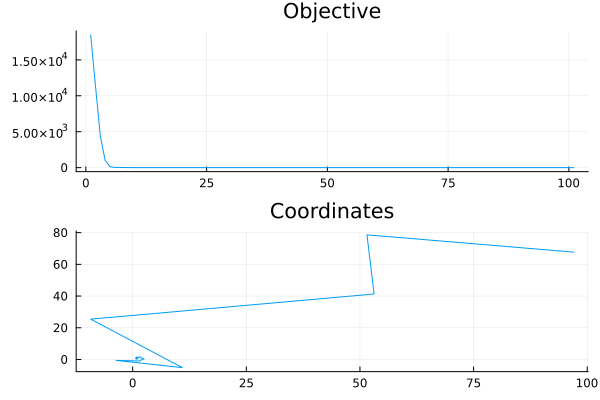

In [2]:
using EO

pop_size = 100
dimension = 3

objective_function  = enclose_arguments(f_sphere, ones(dimension))
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 100, 101)
selection           = enclose_arguments(s_tournament, pop_size*3, 30)
crossover           = identity
mutation            = enclose_arguments(gaussian_preturbation!, 10.)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, pop_size*100)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution.top_value

EO.plot_results(solution)

generation: 0.0; fitness: 98643.15826190627; diversity: 189.63341066041573
generation: 1.0; fitness: 84938.50940563982; diversity: 3475.5493437802966
generation: 2.0; fitness: 72341.3363671541; diversity: 6179.847617716808
generation: 3.0; fitness: 61025.496761656344; diversity: 7107.857053314192
generation: 4.0; fitness: 45497.93700777511; diversity: 6256.307494335825
generation: 5.0; fitness: 28312.272130355446; diversity: 7485.376015382683
generation: 6.0; fitness: 22679.220253202588; diversity: 7384.384819518202
generation: 7.0; fitness: 15780.843943935983; diversity: 6443.462913182875
generation: 8.0; fitness: 9342.240774766355; diversity: 6171.352954656089
generation: 9.0; fitness: 6033.722116605316; diversity: 3096.5951805297154
generation: 10.0; fitness: 2973.5199252825514; diversity: 2947.4675344148936
generation: 11.0; fitness: 2431.4418640051704; diversity: 1560.7514379268264
generation: 12.0; fitness: 1271.1530638880251; diversity: 1262.406391861363
generation: 13.0; fitnes

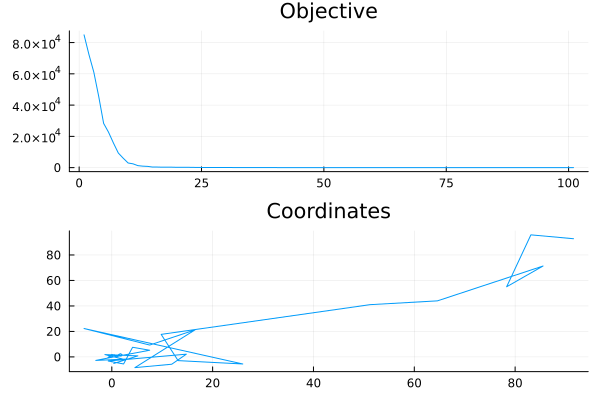

In [16]:
using EO

pop_size = 100
dimension = 10

objective_function  = enclose_arguments(f_sphere, ones(dimension))
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, 100, 101)
#= selection           = enclose_arguments(s_tournament, pop_size*3, 30)
crossover           = cr_single_point
mutation            = enclose_arguments(gaussian_preturbation!, 10.)
replacement         = EO.enclose_replacement(r_keep_best_n, pop_size)
termination         = enclose_argument(iteration_termination, 1000) =#
selection           = enclose_arguments(s_tournament, pop_size, 5)
crossover           = enclose_arguments(EO.cr_parent_sum, pop_size)
mutation            = enclose_arguments(gaussian_preturbation!, 10.)
replacement         = enclose_replacement(EO.r_best_n_diverse, pop_size, 0.7)
termination         = enclose_argument(iteration_termination, 10000)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution.top_value

EO.plot_results(solution)

In [140]:
using Statistics
using Plots

function parse_benchmark_file(name::String)::Tuple{Vector{Vector{Float64}}, Vector{Float64}}
    coord_history = Vector{Vector{Float64}}()
    value_history = Vector{Float64}()
    open(name, "r") do f
        coords = false
        values = false
        while !eof(f)
            line = readline(f)
            if occursin("COORDS", line)
                coords = true
                values = false
                continue
            end
            if occursin("VALUES", line)
                coords = false
                values = true
                continue
            end
            if coords == true
                coord = parse.(Float64, (split(line, ", ")))
                push!(coord_history, coord)
            end
            if values == true
                value = parse.(Float64, line)
                push!(value_history, value)
            end
        end
    end
    return coord_history, value_history
end


"""Average performance of LS on each graph"""
function plot_TSP_benchmark(prefix::String, N_graphs::Int, N_runs::Int)
    """for given LS/ES display average performance on each TSP graph with std"""

    avgs = Vector{Vector{Float64}}()
    stds = Vector{Vector{Float64}}()

    _, values = parse_benchmark_file(prefix*"_G"*string(1)*"_"*string(1))
    value_history = copy(values)
    for run_i in 2:N_runs
        _, v_h = parse_benchmark_file(prefix*"_G"*string(1)*"_"*string(run_i))
        values = hcat(values, v_h)
    end
    value_history = hcat(value_history, copy(values))
    push!(avgs, vec(mean(values, dims=2)))
    push!(stds, vec(std(values,  dims=2)))

    for graph_i in 2:N_graphs
        _, values = parse_benchmark_file(prefix*"_G"*string(graph_i)*"_"*string(1))
        for run_i in 2:N_runs
            _, v_h = parse_benchmark_file(prefix*"_G"*string(graph_i)*"_"*string(run_i))
            values = hcat(values, v_h)
        end
        value_history = hcat(value_history, copy(values))
        push!(avgs, vec(mean(values, dims=2)))
        push!(stds, vec(std(values,  dims=2)))
    end

    average_run = mean(value_history, dims=2)
    std_run     = std(value_history, dims=2)
    return avgs, stds, average_run, std_run
end


plot_TSP_benchmark

length of shortest found sequence: 115398.3095154071


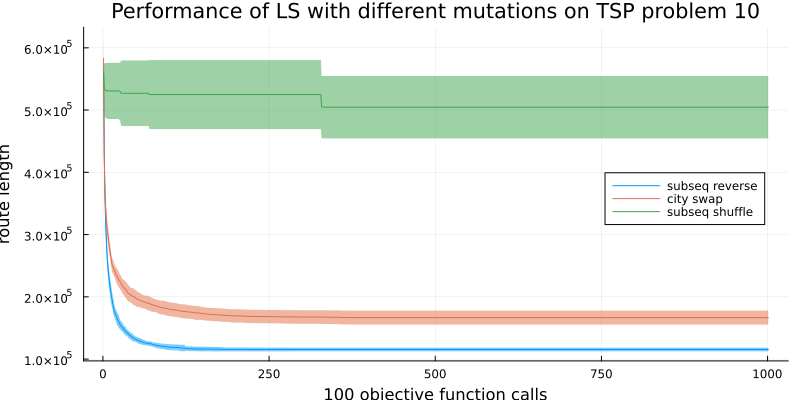

In [147]:
graph_i = 10    # chose any from 1 to 10, corresponds to the list of TSP problems in the introduction
names = ["subseq reverse", "city swap", "subseq shuffle"]

v1, s1, av1, st1 = plot_TSP_benchmark("benchmarks/LS_m"*string(1), 10, 10)
v2, s2, av2, st2 = plot_TSP_benchmark("benchmarks/LS_m"*string(2), 10, 10)
v3, s3, av3, st3 = plot_TSP_benchmark("benchmarks/LS_m"*string(3), 10, 10)

println("length of shortest found sequence: ", min(v1[graph_i]..., v2[graph_i]..., v3[graph_i]...))
p = plot(v1[graph_i], ribbon=s1[graph_i],size=(800, 400), legend=:right, labels=names[1], title="Performance of LS with different mutations on TSP problem "*string(graph_i))
p = plot!(p, v2[graph_i], labels=names[2], ribbon=s2[graph_i],xlabel="100 objective function calls")
p = plot!(p, v3[graph_i], labels=names[3], ribbon=s3[graph_i], ylabel="route length")

length of shortest found sequence: 3822.8204465136846


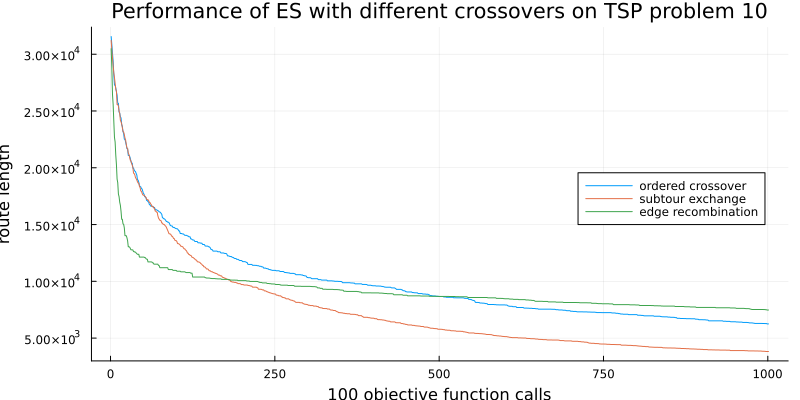

In [120]:
graph_i = 10
names = ["ordered crossover", "subtour exchange", "edge recombination"]

v1, av1, st1 = plot_TSP_LS_benchmark("benchmarks/ES_c"*string(1), 10, 10)
v2, av2, st2 = plot_TSP_LS_benchmark("benchmarks/ES_c"*string(2), 10, 10)
v3, av3, st3 = plot_TSP_LS_benchmark("benchmarks/ES_c"*string(3), 10, 10)

println("length of shortest found sequence: ", min(v1[:,graph_i]..., v2[:,graph_i]..., v3[:,graph_i]...))
p = plot(v1[:,graph_i], size=(800, 400), legend=:right, labels=names[1], title="Performance of ES with different crossovers on TSP problem "*string(graph_i))
p = plot!(p, v2[:,graph_i], labels=names[2], xlabel="100 objective function calls")
p = plot!(p, v3[:,graph_i], labels=names[3], ylabel="route length")